## IMDB - Writing Sentiment Analysis through Natural Language Process
https://www.kaggle.com/c/word2vec-nlp-tutorial

### Data Set
The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

### File descriptions
`labeledTrainData` - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  

`testData` - The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one. 

`unlabeledTrainData` - An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 

`sampleSubmission` - A comma-delimited sample submission file in the correct format.

### Data fields
`id` - Unique ID of each review
`sentiment` - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
`review` - Text of the review

## Part I:  Basic Natural Language Processing

- Part 1 of this tutorial is intended for beginners and covers basic natural language processing techniques, which are needed for later parts of the tutorial.
- NLP (Natural Language Processing) is a set of techniques for approaching text problems. This page will help you get started with loading and cleaning the IMDB movie reviews, then applying a simple Bag of Words model to get surprisingly accurate predictions of whether a review is thumbs-up or thumbs-down.

In [1]:
import pandas as pd

train = pd.read_csv('labeledTrainData.tsv', delimiter='\t', quoting=3)  #quoting =3 ignores ""
test = pd.read_csv('testData.tsv', delimiter='\t', quoting=3)
train.shape

(25000, 3)

In [2]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [4]:
print(train.columns.values)
print(test.columns.values)

['id' 'sentiment' 'review']
['id' 'review']


- Our goal in Part I is to predict **sentiment** of test file using Machine Learning

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [6]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
# check a number of positive or negative sentiment
train.sentiment.value_counts() 

1    12500
0    12500
Name: sentiment, dtype: int64

In [8]:
print(train['review'][0][:1000])
print(train['review'][100][:1000])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

- We see that reviews contain html tags that need to be cleaned.

### Data Cleaning and Text Preprocessing
First, we'll remove the HTML tags. For this purpose, we'll use the `BeautifulSoup` library. 
    - Dealing with Punctuation, Numbers and Stopwords: NLTK and regular expressions

In [9]:
from bs4 import BeautifulSoup

# Initialize the BeautifulSoup object on a single movie review     
ex1 = BeautifulSoup(train["review"][0])  

# Print the raw review and then the output of get_text(), for 
# comparison
print(train["review"][0][:1500])
print(ex1.get_text()[:1000])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

* To remove punctuation and numbers, we will use a package for dealing with regular expressions, called `re`.

In [10]:
import re
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      ex1.get_text() )  # The text to search
print(letters_only[:1000])

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

* Change all text to lower case and split the text into words

In [11]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
print(len(words))
words[:5]

437


['with', 'all', 'this', 'stuff', 'going']

* Finally, we need to decide how to deal with frequently occurring words that don't carry much meaning. Such words are called "stop words"; in English they include words such as "a", "and", "is", and "the". Conveniently, there are Python packages that come with stop word lists built in. Let's import a stop word list from the Python Natural Language Toolkit (NLTK). 

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list
stopwords.words("english")[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaekyunglee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
# words without stopwords
words = [w for w in words if not w in stopwords.words('english')]
words

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

There are many other things we could do to the data - For example, Porter **Stemming** and **Lemmatizing** (both available in NLTK) would allow us to treat "messages", "message", and "messaging" as the same word, which could certainly be useful.

In [14]:
# How to use stemmer?
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('mimimum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

mimimum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [15]:
# How to use LancasterStemmer
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('minimum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

minim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [16]:
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [17]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
words= [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

Now we have code to clean one review - but we need to clean 25,000 training reviews! To make our code reusable, let's create a function `review_to_words` that can be called many times:

In [18]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words. The input is a single string (a raw movie review), 
    # and the output is a single string (a preprocessed movie review)

    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text() 

    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 

    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             

    # 4. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   

    # 6. Stemming words
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    # 7. Join the words back into one string separated by space, and return the result.
    return( " ".join( meaningful_words ))   

In [37]:
clean_train_review = review_to_words(train.review[0])

In [30]:
# apply review_to_words function for all reviews
train['review_clean'] = train['review'].apply(review_to_words)
test['review_clean'] = test['review'].apply(review_to_words)

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                          width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

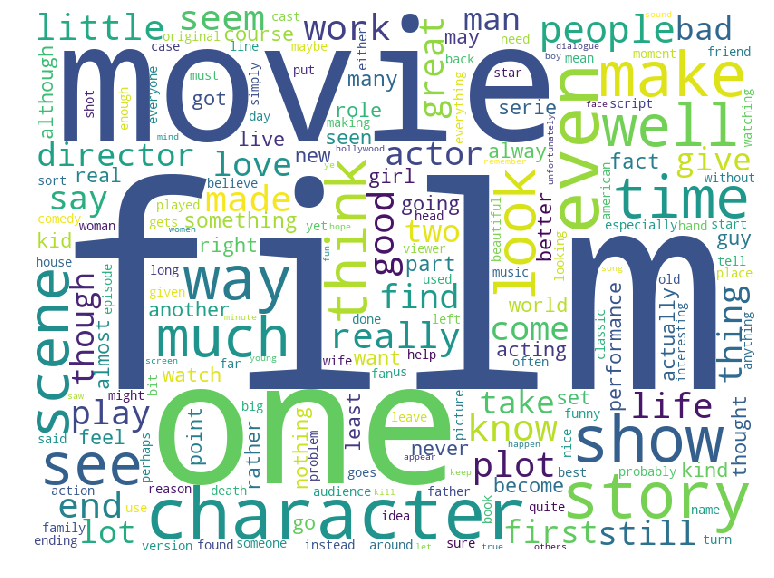

In [32]:
displayWordCloud(' '.join(train.review_clean))

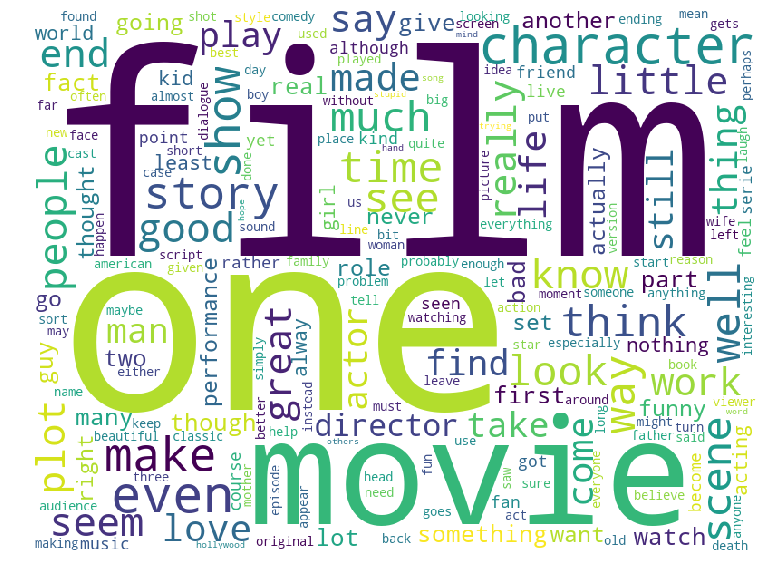

In [34]:
displayWordCloud(' '.join(test.review_clean))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(1, 3),
                             max_features = 20000
                             )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [45]:
pipeline = Pipeline([('vect', vectorizer)])
train_data_features = pipeline.fit_transform(train.review_clean)
train_data_features

<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2627985 stored elements in Compressed Sparse Row format>

In [47]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'abandon',
 'abandoned',
 'abbey',
 'abbot',
 'abbott',
 'abby',
 'abc',
 'abducted']

In [48]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[23 48 51 ... 24 59 40]] aag


,aag,aaron,abandon,abandoned,abbey,abbot,abbott,abby,abc,abducted,...,zombie flick,zombie movie,zombie movies,zombies,zone,zoo,zoom,zooms,zorro,zu
0,23,48,51,187,24,27,30,28,125,30,...,23,51,28,518,147,30,36,24,59,40


In [49]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,aag,aaron,abandon,abandoned,abbey,abbot,abbott,abby,abc,abducted,...,zombie flick,zombie movie,zombie movies,zombies,zone,zoo,zoom,zooms,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2018, verbose=0,
                       warm_start=False)

In [51]:
forest = forest.fit(train_data_features, train['sentiment'])

In [52]:
from sklearn.model_selection import cross_val_score
score = np.mean(cross_val_score(\
    forest, train_data_features, \
    train['sentiment'], cv=10, scoring='roc_auc'))
score

0.9283843840000001

#### References:

- https://medium.com/explore-artificial-intelligence/word2vec-a-baby-step-in-deep-learning-but-a-giant-leap-towards-natural-language-processing-40fe4e8602ba